In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

import sys
sys.path.append('../')
from Code1.Train_Test_Data import train_test 
from Code1.ZPlot import plot_Hyp_Parameter
from Code1.plotting_functions import get_figure_win 


# Train Test Split

In [2]:
scaler = StandardScaler()
Name='j'
Train='j'
Test = 'j2'
Target='Status'
X_train,y_train,machine_ids_train, X_test,y_test,machine_ids_test = train_test(Train,Test,Target)
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [3]:
y_train[:]=1

# SVM

In [4]:
from sklearn import metrics
from sklearn.svm import OneClassSVM as SV

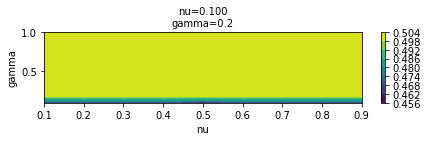

In [5]:
ylabel="gamma"
Set_y=np.logspace(-1,0, 9)                    #Stored  Y axis values


xlabel="nu"
Set_x=np.arange (.1,1,.1)                     #Stored  X axis values

ROC= np.zeros([Set_y.size,Set_x.size])     # Array creation for storing ROC Values

Max=0
for i in Set_x:
    for j in Set_y:
        
        SVM= SV(nu=i,kernel="rbf",gamma=j)        # One class SVM has been defined with variable hyperperameter
        SVM.fit(X_train)                          # One class SVM has been fited with training data
        
        scores= SVM.decision_function(X_test)*(-1)     # Anomaly Scores for X_test

        # Maintained the ROC matrix index to store ROC values
        ROC[np.where(Set_y==j),np.where(Set_x==i)] = metrics.roc_auc_score(y_test, scores)
        
        #taking hyperparameter that give maximum ROC_AUC_Score
        if ROC[np.where(Set_y == j),np.where(Set_x == i)]>Max:
            
            Max=ROC[np.where(Set_y == j),np.where(Set_x == i)]
            (a,b)=(i,j) 

# Plot creation
plot_Hyp_Parameter(Name,xlabel,ylabel,Set_x,Set_y,ROC,a,b)                   

# NNearest Neighbors

In [6]:
from sklearn.neighbors import NearestNeighbors

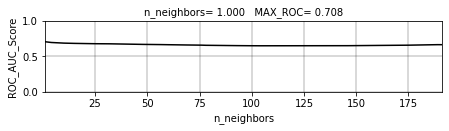

In [7]:
Max=0
ROC= []

xlabel="n_neighbors"
Set_x=np.arange (1,len(X_train) ,1)                     #Stored  X axis values

ylabel="ROC_AUC_Score"
Set_y=np.arange (0,1.1,.1)                    #Stored  y axis values

for i in Set_x:                      # For loop in order to get roc value for each n_neighbors
    
    NearestN = NearestNeighbors(n_neighbors=i)
    NearestN.fit(X_train)
 
    distances, indices = NearestN.kneighbors(X_test)
    scores=distances.mean(axis=1)

    ROC.append(metrics.roc_auc_score(y_test, scores))#Stored ROC accuracy score
    NROC_val=metrics.roc_auc_score(y_test, scores)  #Get current roc value
    
    if NROC_val>Max: 
        Max=NROC_val 
        a=i

plot_Hyp_Parameter(Name,xlabel,ylabel,Set_x,Set_y,ROC,a,c=Max)  

# PCA

In [8]:
import matplotlib.cm as cm
from sklearn.decomposition import PCA

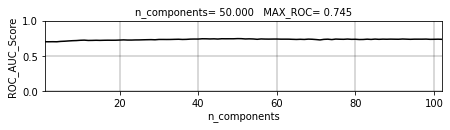

In [9]:
Max=0
ROC= []

xlabel="n_components"
Set_x=np.arange (1,103,1)                     #Stored  X axis values

ylabel="ROC_AUC_Score"
Set_y=np.arange (0,1.1,.1) 

for i in Set_x:                      # For loop in order to get roc value for each nP
    
    pca = PCA(n_components=i,random_state=1) 
    pca.fit(X_train)
    
    
   
    pca2_proj_back=pca.inverse_transform(pca.transform(X_test))         #Applying inversePCA on each point of the rectangular grid
    diff = (pca2_proj_back-np.c_[X_test]) **2                   #Calculating the difference betwen pca2_results and pca2_proj_back
                                       
    scores = diff.mean(axis=1 ) 

    ROC.append(metrics.roc_auc_score(y_test, scores))          #Stored ROC accuracy score

    
    NROC_val=metrics.roc_auc_score(y_test, scores)            #Taking max ROC value
    if NROC_val>Max: 
        Max=NROC_val 
        a=i
           
plot_Hyp_Parameter("PCA",xlabel,ylabel,Set_x,Set_y,ROC,a,c=Max)   

# Isolation Forest

In [10]:
from sklearn.ensemble import IsolationForest


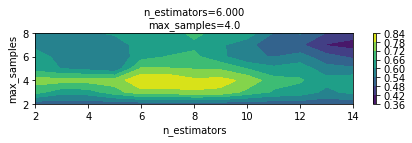

In [25]:
ylabel="max_samples"
Set_y=np.arange (2,9,1)                    #Stored  X axis values


xlabel="n_estimators"
Set_x=np.arange(2,15,1)                     #Stored  Y axis values

ROC= np.zeros([Set_y.size,Set_x.size])     # Array creation for storing ROC Values

Max=0
for i in Set_x:
    for j in Set_y:
        
        Iso= IsolationForest(n_estimators=i,max_samples =j,random_state=0)   # IsolationForest has been defined with variable hyperperameter
        Iso.fit(X_train)                                                     # IsolationForest has been fited with training data
        
        scores= Iso.decision_function(X_test)*(-1)                                # Anomaly Scores for X_test

        # Maintained the ROC matrix index to store ROC values
        ROC[np.where(Set_y==j),np.where(Set_x==i)] = metrics.roc_auc_score(y_test, scores)
        
        #taking hyperparameter that give maximum ROC_AUC_Score
        if ROC[np.where(Set_y == j),np.where(Set_x == i)]>Max:
            
            Max=ROC[np.where(Set_y == j),np.where(Set_x == i)]
            (a,b)=(i,j) 

# Plot creation
plot_Hyp_Parameter(Name,xlabel,ylabel,Set_x,Set_y,ROC,a,b)                   

# PCA with Nearest Neighbors

In [ ]:

ylabel="n_neighbors"
Set_y=np.arange (1,len(X_train) ,1)                     #Stored  X axis values


xlabel="n_components"
Set_x=np.arange (1,30,1)                     #started from 103 then found 10 so made it max= 15

ROC= np.zeros([Set_y.size,Set_x.size])     # Array creation for storing ROC Values

Max=0
for i in Set_x:
    for j in Set_y:
        
        pca = PCA(n_components=i) 
        X_train1=pca.fit_transform(X_train)
        X_test1=pca.transform(X_test)

    

        NearestN = NearestNeighbors(n_neighbors=j)
        NearestN.fit(X_train1)

        distances, indices = NearestN.kneighbors(X_test1)
        scores_HB=distances.mean(axis=1)
        # Maintained the ROC matrix index to store ROC values
        ROC[np.where(Set_y==j),np.where(Set_x==i)] = metrics.roc_auc_score(y_test, scores_HB)
        
        #taking hyperparameter that give maximum ROC_AUC_Score
        if ROC[np.where(Set_y == j),np.where(Set_x == i)]>Max:
            
            Max=ROC[np.where(Set_y == j),np.where(Set_x == i)]
            (a,b)=(i,j) 

# Plot creation
plot_Hyp_Parameter(Name,xlabel,ylabel,Set_x,Set_y,ROC,a,b)        

In [ ]:
# LOF

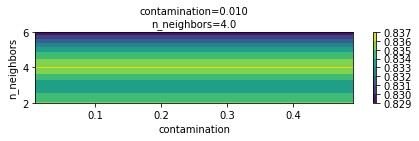

In [9]:
from sklearn.neighbors import LocalOutlierFactor
xlabel="contamination"
Set_x=np.arange (0.01,0.5,.01)                    #Stored  X axis values


ylabel="n_neighbors"
Set_y=np.arange(2,7,1)                     #Stored  Y axis values

ROC= np.zeros([Set_y.size,Set_x.size])     # Array creation for storing ROC Values

Max=0
for i in Set_x:
    for j in Set_y:
        
        LO= LocalOutlierFactor(n_neighbors=j, contamination=i,novelty="true")   # IsolationForest has been defined with variable hyperperameter
        LO.fit(X_train)                                                     # IsolationForest has been fited with training data
        
        scores= LO.decision_function(X_test)*(-1)                                # Anomaly Scores for X_test

        # Maintained the ROC matrix index to store ROC values
        ROC[np.where(Set_y==j),np.where(Set_x==i)] = metrics.roc_auc_score(y_test, scores)
        
        #taking hyperparameter that give maximum ROC_AUC_Score
        if ROC[np.where(Set_y == j),np.where(Set_x == i)]>Max:
            
            Max=ROC[np.where(Set_y == j),np.where(Set_x == i)]
            (a,b)=(i,j) 

# Plot creation
plot_Hyp_Parameter(Name,xlabel,ylabel,Set_x,Set_y,ROC,a,b)       


In [10]:
#PCA on LOF

In [17]:
import matplotlib.cm as cm
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor

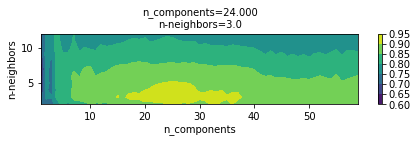

In [20]:
ylabel="n-neighbors"
Set_y= np.arange (2,13,1)                  #Stored  X axis values
ulabel="contamination"
Set_u=  np.arange (0.01,0.5,.01)   

xlabel="n_components"
Set_x=np.arange (1,60,1)                     #Stored  X axis values

ROC= np.zeros([Set_y.size,Set_x.size])     # Array creation for storing ROC Values

Max=0
for i in Set_x:
    for j in Set_y:


        pca = PCA(n_components=i,random_state=1) 
        X_train1=pca.fit_transform(X_train)
        X_test1=pca.transform(X_test)



        LO= LocalOutlierFactor(n_neighbors=j, contamination=0.1,novelty="true")   # IsolationForest has been defined with variable hyperperameter
        LO.fit(X_train1)                                                     # IsolationForest has been fited with training data

        scores= LO.decision_function(X_test1)*(-1)                                # Anomaly Scores for X_test

        # Maintained the ROC matrix index to store ROC values
        ROC[np.where(Set_y==j),np.where(Set_x==i)] = metrics.roc_auc_score(y_test, scores)
        
        #taking hyperparameter that give maximum ROC_AUC_Score
        if ROC[np.where(Set_y == j),np.where(Set_x == i)]>Max:
            
            Max=ROC[np.where(Set_y == j),np.where(Set_x == i)]
            (a,b)=(i,j) 

# Plot creation
plot_Hyp_Parameter(Name,xlabel,ylabel,Set_x,Set_y,ROC,a,b)


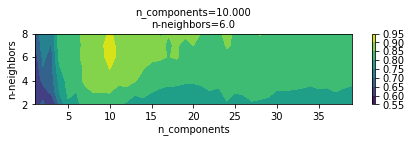

In [14]:
ylabel="n-neighbors"
Set_y= np.arange (2,9,1)                  #Stored  X axis values
ulabel="contamination"
Set_u=  np.arange (0.01,0.5,.01)   

xlabel="n_components"
Set_x=np.arange (1,40,1)                     #Stored  X axis values

ROC= np.zeros([Set_y.size,Set_x.size])     # Array creation for storing ROC Values

Max=0
for i in Set_x:
    for j in Set_y:


        pca = PCA(n_components=i,random_state=1) 
        X_train1=pca.fit_transform(X_train)
        X_test1=pca.transform(X_test)



        LO= LocalOutlierFactor(n_neighbors=j, contamination=0.01,novelty="true")   # IsolationForest has been defined with variable hyperperameter
        LO.fit(X_train1)                                                     # IsolationForest has been fited with training data

        scores= LO.decision_function(X_test1)*(-1)                                # Anomaly Scores for X_test

        # Maintained the ROC matrix index to store ROC values
        ROC[np.where(Set_y==j),np.where(Set_x==i)] = metrics.roc_auc_score(y_test, scores)
        
        #taking hyperparameter that give maximum ROC_AUC_Score
        if ROC[np.where(Set_y == j),np.where(Set_x == i)]>Max:
            
            Max=ROC[np.where(Set_y == j),np.where(Set_x == i)]
            (a,b)=(i,j) 

# Plot creation
plot_Hyp_Parameter(Name,xlabel,ylabel,Set_x,Set_y,ROC,a,b)


In [ ]:
# SHrunk

In [46]:
from sklearn.model_selection import ParameterGrid
from sklearn.svm import OneClassSVM as SV
grid = {'gamma' : np.logspace(-9, 3, 13),
        'nu' : np.linspace(0.01, 0.99, 99)}
clf=SV(kernel = "rbf")
for z in ParameterGrid(grid):
    clf.set_params(**z)
    clf.fit(X=X_train)
    

In [ ]:
#plt.hist(s,color="r")
plt.hist(s1,color="k")

In [ ]:
Max=0
ROC= []

zlabel="n_neighbors"
Set_z=np.arange (1,len(X_train) ,1)                     #Stored  X axis values

xlabel="n_components"
Set_x=np.arange (1,103,1)                     #Stored  X axis values

ylabel="ROC_AUC_Score"
Set_y=np.arange (0,1.1,.1) 

for i in Set_x:                      # For loop in order to get roc value for each nP
    
    for j in Set_z:                      # For loop in order to get roc value for each n_neighbors
        pca = PCA(n_components=i) 
        pca.fit(X_train)



        pca2_proj_back=pca.inverse_transform(pca.transform(X_test))         #Applying inversePCA on each point of the rectangular grid

    
        NearestN = NearestNeighbors(n_neighbors=j)
        NearestN.fit(X_train)

        distances, indices = NearestN.kneighbors(pca2_proj_back)
        scores=(-1)*distances.mean(axis=1)

        
        NROC_val=metrics.roc_auc_score(y_test, scores)  #Get current roc value

        if NROC_val>Max: 
            Max=NROC_val 
            a=i
            b=j
      

print (Max,a,b)

In [ ]:
# Applying PCA on nearest neighbors

In [ ]:
Max=0
ROC= []

zlabel="n_neighbors"
Set_z=np.arange (1,len(X_train) ,1)                     #Stored  X axis values

xlabel="n_components"
Set_x=np.arange (1,103,1)                     #Stored  X axis values

ylabel="ROC_AUC_Score"
Set_y=np.arange (0,1.1,.1) 

for i in Set_x:                      # For loop in order to get roc value for each nP
    
    for j in Set_z:                      # For loop in order to get roc value for each n_neighbors
        pca = PCA(n_components=i) 
        X_train1=pca.fit_transform(X_train)
        X_test1=pca.transform(X_test)



        pca2_proj_back=(X_test1)         #Applying inversePCA on each point of the rectangular grid

    
        NearestN = NearestNeighbors(n_neighbors=j)
        NearestN.fit(X_train1)

        distances, indices = NearestN.kneighbors(pca2_proj_back)
        scores=(-1)*distances.mean(axis=1)

        
        NROC_val=metrics.roc_auc_score(y_test, scores)  #Get current roc value

        if NROC_val>Max: 
            Max=NROC_val 
            a=i
            b=j
      

print (Max,a,b)

# Applying PCA in SVM

In [ ]:
Max=0
ROC= []

ylabel="gamma"
Set_y=np.logspace(-1,0, 9)                    #Stored  Y axis values


zlabel="nu"
Set_z=np.arange (.1,1,.1)                     #Stored  X axis values

xlabel="n_components"
Set_x=np.arange (1,103,1)                     #Stored  X axis values


for i in Set_x:                      # For loop in order to get roc value for each nP
    for k in Set_z:
        for j in Set_y:
            pca = PCA(n_components=i) 
            X_train1=pca.fit_transform(X_train)
            X_test1=pca.transform(X_test)


            SVM= SV(nu=k,kernel="sigmoid",gamma=j)        # One class SVM has been defined with variable hyperperameter
            SVM.fit(X_train1)                          # One class SVM has been fited with training data

            scores= SVM.decision_function(X_test1)     # Anomaly Scores for X_test

            ROC.append(metrics.roc_auc_score(y_test, scores))#Stored ROC accuracy score
            NROC_val=metrics.roc_auc_score(y_test, scores)  #Get current roc value

            if NROC_val>Max: 
                Max=NROC_val 
                a=i
                b=j
                c=k
 

print (Max,a,b,c)

In [ ]:
Max

In [ ]:
0.731163708086785 2 0.1333521432163324 0.2

In [ ]:
# Auto + SVM

In [ ]:
Max=0
ROC= []

ylabel="gamma"
Set_y=np.logspace(-1,0, 9)                    #Stored  Y axis values


zlabel="nu"
Set_z=np.arange (.1,1,.1)                     #Stored  X axis values

xlabel="n_components"
Set_x=np.arange (1,103,1)                     #Stored  X axis values


for i in Set_x:                      # For loop in order to get roc value for each nP
    for k in Set_z:
        for j in Set_y:
            pca = PCA(n_components=i) 
            X_train=pca.fit_tranform(X_train)
            X_test=pca.tranform(X_test)



            pca2_proj_back=pca.inverse_transform(pca.transform(X_test))         #Applying inversePCA on each point of the rectangular grid


            SVM= SV(nu=k,kernel="rbf",gamma=j)        # One class SVM has been defined with variable hyperperameter
            SVM.fit(X_train)                          # One class SVM has been fited with training data

            scores= SVM.decision_function(pca2_proj_back)     # Anomaly Scores for X_test

            ROC.append(metrics.roc_auc_score(y_test, scores))#Stored ROC accuracy score
            NROC_val=metrics.roc_auc_score(y_test, scores)  #Get current roc value

            if NROC_val>Max: 
                Max=NROC_val 
                a=i
                b=j
                c=k
 

print (Max,a,b,c)

In [ ]:
Max=0
ROC= []

ylabel="max_sample"
Set_y=np.arange (2,15,1)                    #Stored  Y axis values


zlabel="N-estimator"
Set_z=np.arange(2,9,1)                     #Stored  X axis values

xlabel="n_components"
Set_x=np.arange (1,103,1)                     #Stored  X axis values


for i in Set_x:                      # For loop in order to get roc value for each nP
    for k in Set_z:
        for j in Set_y:
            pca = PCA(n_components=i) 
            pca.fit(X_train)



            Iso= IsolationForest(n_estimators=k,max_samples =j,random_state=0)   # IsolationForest has been defined with variable hyperperameter
            Iso.fit(X_train)                                                     # IsolationForest has been fited with training data
        
            scores= (-1)*Iso.decision_function(X_test)                                # Anomaly Scores for X_test

            ROC.append(metrics.roc_auc_score(y_test, scores))#Stored ROC accuracy score
            NROC_val=metrics.roc_auc_score(y_test, scores)  #Get current roc value

            if NROC_val>Max: 
                Max=NROC_val 
                a=i
                b=j
                c=k
 

print (Max,a,b,c)